In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from pylab import*

import seaborn as sns
from optbinning import OptimalBinning


from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import ks_2samp

from sklearn.model_selection import (GridSearchCV, cross_val_score,
                                                 RandomizedSearchCV,
                                                 cross_validate,
                                                 StratifiedKFold)

In [3]:
ruta="/Users/Naye/Documents/python/Seminario-estadista/tarea2/"
base="tabla.xlsx"
df = pd.read_excel(ruta+base, sheet_name=0)

In [4]:
df.head()

,_id_,_id2_,comp_mixto1,comp_externo1,comp_externo2,comp_externo3,comp_externo4,fecha_inicio,comp_interno1,comp_interno2,comp_interno3,comp_interno4,categoria1,categoria2,categoria3,inversion,Y
0,78213,1798899,0.33522,260.869565,25.854639,56,-230.0,2020-03-25,0.000000,b'0',11,58,2,9,156,0.000000,1
1,76457,1758511,0.33334,40.579710,2.872738,62,-230.0,2020-02-13,0.000000,b'1',28,45,1,4,173,0.041039,1
2,40666,935318,0.29186,0.000000,0.000000,119,-230.0,2018-01-24,0.000000,b'1',25,45,1,9,170,0.000000,1
3,8329,191567,0.29112,349.275362,34.616490,94,-230.0,2016-10-07,0.000000,b'1',14,59,3,3,159,0.000000,1
4,68389,1572947,0.27318,276.811594,27.434645,125,-230.0,2019-07-30,2026.342452,b'1',1,67,2,9,146,77.422135,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   _id_           50000 non-null  int64  
 1   _id2_          50000 non-null  int64  
 2   comp_mixto1    50000 non-null  float64
 3   comp_externo1  50000 non-null  float64
 4   comp_externo2  50000 non-null  float64
 5   comp_externo3  50000 non-null  int64  
 6   comp_externo4  50000 non-null  float64
 7   fecha_inicio   50000 non-null  object 
 8   comp_interno1  50000 non-null  float64
 9   comp_interno2  50000 non-null  object 
 10  comp_interno3  50000 non-null  int64  
 11  comp_interno4  50000 non-null  int64  
 12  categoria1     50000 non-null  int64  
 13  categoria2     50000 non-null  int64  
 14  categoria3     50000 non-null  int64  
 15  inversion      50000 non-null  float64
 16  Y              50000 non-null  int64  
dtypes: float64(6), int64(9), object(2)
memory usage: 6

In [7]:
df['Y'].value_counts(normalize=True)

1    0.84802
0    0.15198
Name: Y, dtype: float64

In [8]:
df['comp_interno1'].value_counts(normalize=True)

0.000000       0.64166
1013.171226    0.03892
1519.756839    0.02962
2026.342452    0.02680
810.536981     0.01828
                ...   
5632.218845    0.00002
3737.588652    0.00002
3026.342452    0.00002
523.809524     0.00002
1274.569402    0.00002
Name: comp_interno1, Length: 680, dtype: float64

In [9]:
df['categoria2'].value_counts(normalize=True)

9     0.66144
6     0.12202
3     0.06234
8     0.03978
11    0.03676
5     0.02142
7     0.01744
4     0.01542
1     0.00926
10    0.00800
13    0.00380
2     0.00174
12    0.00058
Name: categoria2, dtype: float64

In [10]:
df['comp_mixto1'].value_counts()

0.38000    4662
0.37000    3478
0.34000    2027
0.36000    1626
0.30000     571
           ... 
0.27062       1
0.25734       1
0.22504       1
0.23374       1
0.25682       1
Name: comp_mixto1, Length: 7098, dtype: int64

In [11]:
df['comp_interno2'].value_counts(normalize=True)

b'1'    0.70584
b'0'    0.29416
Name: comp_interno2, dtype: float64

In [12]:
train, test = train_test_split(df, test_size = 0.30, random_state = 100) 

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35000 entries, 48824 to 38408
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   _id_           35000 non-null  int64  
 1   _id2_          35000 non-null  int64  
 2   comp_mixto1    35000 non-null  float64
 3   comp_externo1  35000 non-null  float64
 4   comp_externo2  35000 non-null  float64
 5   comp_externo3  35000 non-null  int64  
 6   comp_externo4  35000 non-null  float64
 7   fecha_inicio   35000 non-null  object 
 8   comp_interno1  35000 non-null  float64
 9   comp_interno2  35000 non-null  object 
 10  comp_interno3  35000 non-null  int64  
 11  comp_interno4  35000 non-null  int64  
 12  categoria1     35000 non-null  int64  
 13  categoria2     35000 non-null  int64  
 14  categoria3     35000 non-null  int64  
 15  inversion      35000 non-null  float64
 16  Y              35000 non-null  int64  
dtypes: float64(6), int64(9), object(2)
memory usag

In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 4253 to 25776
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   _id_           15000 non-null  int64  
 1   _id2_          15000 non-null  int64  
 2   comp_mixto1    15000 non-null  float64
 3   comp_externo1  15000 non-null  float64
 4   comp_externo2  15000 non-null  float64
 5   comp_externo3  15000 non-null  int64  
 6   comp_externo4  15000 non-null  float64
 7   fecha_inicio   15000 non-null  object 
 8   comp_interno1  15000 non-null  float64
 9   comp_interno2  15000 non-null  object 
 10  comp_interno3  15000 non-null  int64  
 11  comp_interno4  15000 non-null  int64  
 12  categoria1     15000 non-null  int64  
 13  categoria2     15000 non-null  int64  
 14  categoria3     15000 non-null  int64  
 15  inversion      15000 non-null  float64
 16  Y              15000 non-null  int64  
dtypes: float64(6), int64(9), object(2)
memory usage

In [15]:
y = train.Y

In [16]:
#optb de todas las columnas 

optb_comp_mixto1=OptimalBinning(name="comp_mixto1", dtype="numerical", solver="cp")


optb_comp_externo1=OptimalBinning(name="comp_externo1", dtype="numerical", solver="cp",monotonic_trend="descending")
optb_comp_externo2=OptimalBinning(name="comp_externo2", dtype="numerical", solver="cp",monotonic_trend="descending")
optb_comp_externo3=OptimalBinning(name="comp_externo3", dtype="numerical", solver="cp",monotonic_trend="descending")
optb_comp_externo4=OptimalBinning(name="comp_externo4",  dtype="categorical", solver="mip")
optb_comp_interno2= OptimalBinning(name="comp_interno2", dtype="numerical", solver="cp",monotonic_trend="descending")
optb_fecha_inicio=OptimalBinning(name="fecha_inicio",  dtype="categorical", solver="mip")
#optb_fecha_inicio=OptimalBinning(name="comp_interno2", dtype="numerical", solver="cp",monotonic_trend="descending")

optb_comp_interno1 = OptimalBinning(name="comp_interno2", dtype="numerical", solver="cp",monotonic_trend="descending")
optb_comp_interno2=OptimalBinning(name="comp_interno2",  dtype="categorical", solver="mip")
optb_categoria1=OptimalBinning(name="categoria1",  dtype="categorical", solver="mip")
optb_categoria2=OptimalBinning(name="categoria2",  dtype="categorical", solver="mip")
optb_categoria3=OptimalBinning(name="categoria3",  dtype="categorical", solver="mip")
optb_inversion = OptimalBinning(name="inversion", dtype="numerical", solver="cp",monotonic_trend="descending")



In [17]:
optb_comp_mixto1.fit(train["comp_mixto1"].values,y)
optb_comp_externo1.fit(train["comp_externo1"].values,y)
optb_comp_externo2.fit(train["comp_externo2"].values,y)
optb_comp_externo3.fit(train["comp_externo3"].values,y)
optb_comp_externo4.fit(train["comp_externo4"].values,y)
optb_comp_interno2.fit(train["comp_interno2"].values,y)
optb_fecha_inicio.fit(train["fecha_inicio"].values,y)
optb_comp_interno1.fit(train["comp_interno1"].values,y)
optb_comp_interno2.fit(train["comp_interno2"].values,y)
optb_categoria1.fit(train["categoria1"].values,y)
optb_categoria2.fit(train["categoria2"].values,y)
optb_categoria3.fit(train["categoria3"].values,y)
optb_inversion.fit(train["inversion"].values,y)


OptimalBinning(monotonic_trend='descending', name='inversion')

In [18]:
display(optb_comp_mixto1.splits)
display(optb_comp_externo1.splits)
display(optb_comp_externo2.splits)
display(optb_comp_externo3.splits)
display(optb_comp_externo4.splits)
display(optb_comp_interno2.splits)
display(optb_comp_interno1.splits)
display(optb_comp_interno2.splits)
display(optb_categoria1.splits)
display(optb_categoria2.splits)
display(optb_categoria3.splits)
display(optb_inversion.splits)

array([0.35309   , 0.36001001, 0.36760999, 0.37019001])

array([  8.6942029 , 166.36376953, 275.79708862, 404.2956543 ,
       555.86956787, 940.99710083])

array([16.48592377, 28.56937695, 33.14665413, 40.405056  , 62.208992  ,
       88.63832474])

array([-26.5, 114.5, 120.5, 124.5, 129.5])

[array([-227., -228., -229.]),
 array([-2.30000000e+02,  9.99999977e+09, -2.26000000e+02])]

[array(["b'1'"], dtype=object), array(["b'0'"], dtype=object)]

array([1265.4508667 , 2017.73046875, 3672.74572754])

[array(["b'1'"], dtype=object), array(["b'0'"], dtype=object)]

[array([1], dtype=int64),
 array([2], dtype=int64),
 array([4, 3, 5, 6], dtype=int64)]

[array([12,  4, 13,  9], dtype=int64),
 array([2, 1, 6], dtype=int64),
 array([3, 5], dtype=int64),
 array([ 8, 11, 10,  7], dtype=int64)]

[array([172, 175, 157, 158], dtype=int64),
 array([155, 165, 167], dtype=int64),
 array([152, 162, 176, 159], dtype=int64),
 array([164], dtype=int64),
 array([160], dtype=int64),
 array([169, 166], dtype=int64),
 array([156, 171], dtype=int64),
 array([146, 153, 150], dtype=int64),
 array([168, 151, 154], dtype=int64),
 array([161, 148, 173], dtype=int64),
 array([170, 163, 149, 177, 174, 147], dtype=int64)]

array([5.68027999e-02, 7.98553734e+01, 2.61636887e+02])

In [19]:
comp_mixto1_table=optb_comp_mixto1.binning_table
comp_externo1_table=optb_comp_externo1.binning_table
comp_externo2_table=optb_comp_externo2.binning_table
comp_externo3_table=optb_comp_externo3.binning_table
comp_externo4_table=optb_comp_externo4.binning_table
comp_interno2_table=optb_comp_interno2.binning_table
fecha_inicio_table=optb_fecha_inicio.binning_table
comp_interno1_table=optb_comp_interno1.binning_table
comp_interno2_table=optb_comp_interno2.binning_table
categoria1_table=optb_categoria1.binning_table
categoria2_table=optb_categoria2.binning_table
categoria3_table=optb_categoria3.binning_table
inversion_table=optb_inversion.binning_table

In [20]:
display(comp_mixto1_table.build())
display(comp_externo1_table.build())
display(comp_externo2_table.build())
display(comp_externo3_table.build())

display(comp_externo4_table.build())
display(comp_interno2_table.build())

display(fecha_inicio_table.build())
display(comp_interno1_table.build())

display(categoria1_table.build())
display(categoria2_table.build())
display(categoria3_table.build())
display(inversion_table.build())

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[-inf, 0.35)",19808,0.565943,3095,16713,0.843750,0.025525,0.000372,0.000047
1,"[0.35, 0.36)",3013,0.086086,574,2439,0.809492,0.26521,0.006626,0.000826
2,"[0.36, 0.37)",2463,0.070371,402,2061,0.836784,0.07743,0.000433,0.000054
3,"[0.37, 0.37)",4256,0.121600,682,3574,0.839756,0.055513,0.000382,0.000048
4,"[0.37, inf)",5460,0.156000,599,4861,0.890293,-0.381814,0.019868,0.002469
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,35000,1.000000,5352,29648,0.847086,,0.027682,0.003443


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[-inf, 8.69)",1813,0.051800,239,1574,0.868174,-0.172988,0.001459,0.000182
1,"[8.69, 166.36)",10886,0.311029,1464,9422,0.865515,-0.149951,0.006636,0.000829
2,"[166.36, 275.80)",5930,0.169429,833,5097,0.859528,-0.099449,0.001618,0.000202
3,"[275.80, 404.30)",4598,0.131371,666,3932,0.855154,-0.063689,0.000521,0.000065
4,"[404.30, 555.87)",3583,0.102371,577,3006,0.838962,0.061401,0.000394,0.000049
5,"[555.87, 941.00)",4843,0.138371,856,3987,0.823250,0.1734,0.004415,0.000551
6,"[941.00, inf)",3347,0.095629,717,2630,0.785778,0.412261,0.018659,0.002316
7,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
8,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,35000,1.000000,5352,29648,0.847086,,0.033703,0.004195


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[-inf, 16.49)",15152,0.432914,2065,13087,0.863714,-0.134565,0.007479,9.341086e-04
1,"[16.49, 28.57)",6147,0.175629,851,5296,0.861558,-0.116371,0.002284,2.852856e-04
2,"[28.57, 33.15)",1888,0.053943,278,1610,0.852754,-0.044444,0.000105,1.311342e-05
3,"[33.15, 40.41)",1988,0.056800,302,1686,0.848089,-0.007763,0.000003,4.266978e-07
4,"[40.41, 62.21)",4247,0.121343,716,3531,0.831410,0.116268,0.001707,2.132952e-04
5,"[62.21, 88.64)",2599,0.074257,473,2126,0.818007,0.209022,0.003484,4.347623e-04
6,"[88.64, inf)",2979,0.085114,667,2312,0.776099,0.468846,0.021869,2.708880e-03
7,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
8,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
Totals,,35000,1.000000,5352,29648,0.847086,,0.036931,4.589872e-03


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[-inf, -26.50)",1792,0.051200,244,1548,0.863839,-0.135626,0.000898,1.121822e-04
1,"[-26.50, 114.50)",21732,0.620914,3022,18710,0.860942,-0.111215,0.007387,9.229212e-04
2,"[114.50, 120.50)",3114,0.088971,474,2640,0.847784,-0.005403,0.000003,3.239958e-07
3,"[120.50, 124.50)",2396,0.068457,436,1960,0.818030,0.208867,0.003207,4.001891e-04
4,"[124.50, 129.50)",3484,0.099543,672,2812,0.807118,0.280531,0.008616,1.073524e-03
5,"[129.50, inf)",2482,0.070914,504,1978,0.796938,0.344659,0.009462,1.176976e-03
6,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
7,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
Totals,,35000,1.000000,5352,29648,0.847086,,0.029574,3.686117e-03


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[-227.0, -228.0, -229.0]",2826,0.080743,461,2365,0.836872,0.076789,0.000489,0.000061
1,"[-230.0, 9999999769.99, -226.0]",32174,0.919257,4891,27283,0.847983,-0.006943,0.000044,0.000006
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,35000,1.000000,5352,29648,0.847086,,0.000533,0.000067


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[b'1'],24774,0.707829,3832,20942,0.845322,0.013554,0.000131,0.000016
1,[b'0'],10226,0.292171,1520,8706,0.851359,-0.033378,0.000322,0.000040
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,35000,1.000000,5352,29648,0.847086,,0.000452,0.000057


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[2021-04-30, 2021-02-02, 2021-01-30, 2021-01-2...",3355,0.095857,3195,160,0.047690,4.706093,2.784014,0.193356
1,"[2017-02-04, 2016-04-09, 2020-11-05, 2020-11-0...",1750,0.050000,425,1325,0.757143,0.574846,0.019958,0.002461
2,"[2016-08-05, 2016-03-30, 2016-09-19, 2018-01-1...",2219,0.063400,316,1903,0.857594,-0.08352,0.000430,0.000054
3,"[2018-01-05, 2019-07-10, 2018-03-06, 2018-06-0...",1769,0.050543,208,1561,0.882419,-0.303619,0.004186,0.000521
4,"[2017-01-05, 2019-11-22, 2017-02-15, 2018-02-1...",1849,0.052829,190,1659,0.897242,-0.455022,0.009308,0.001154
5,"[2016-06-01, 2020-05-06, 2020-05-28, 2017-08-2...",2583,0.073800,230,2353,0.910956,-0.613443,0.022323,0.002747
6,"[2016-06-28, 2020-08-20, 2016-12-15, 2019-10-0...",2865,0.081857,214,2651,0.925305,-0.804792,0.039781,0.004843
7,"[2019-02-21, 2019-01-22, 2017-12-15, 2020-07-2...",1839,0.052543,120,1719,0.934747,-0.950082,0.033784,0.004071
8,"[2017-11-30, 2020-09-21, 2016-03-08, 2020-05-0...",1758,0.050229,103,1655,0.941411,-1.064903,0.038950,0.004651
9,"[2016-12-06, 2017-03-01, 2016-12-16, 2017-08-1...",1786,0.051029,90,1696,0.949608,-1.224294,0.049447,0.005822


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[-inf, 1265.45)",28134,0.803829,4155,23979,0.852314,-0.040942,0.001328,0.000166
1,"[1265.45, 2017.73)",1932,0.055200,327,1605,0.830745,0.121005,0.000843,0.000105
2,"[2017.73, 3672.75)",2829,0.080829,490,2339,0.826794,0.148851,0.001885,0.000235
3,"[3672.75, inf)",2105,0.060143,380,1725,0.819477,0.199113,0.002552,0.000319
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,35000,1.000000,5352,29648,0.847086,,0.006608,0.000825


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[1],15924,0.454971,2586,13338,0.837604,0.07142,0.002379,0.000297
1,[2],10537,0.301057,1642,8895,0.844168,0.02235,0.000152,0.000019
2,"[4, 3, 5, 6]",8539,0.243971,1124,7415,0.868369,-0.174687,0.007003,0.000874
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,35000,1.000000,5352,29648,0.847086,,0.009533,0.001190


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[12, 4, 13, 9]",23854,0.681543,3949,19905,0.834451,0.094416,0.006277,0.000784
1,"[2, 1, 6]",4652,0.132914,621,4031,0.866509,-0.158514,0.003159,0.000394
2,"[3, 5]",2934,0.083829,381,2553,0.870143,-0.190301,0.002840,0.000354
3,"[8, 11, 10, 7]",3560,0.101714,401,3159,0.887360,-0.352125,0.011136,0.001385
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,35000,1.000000,5352,29648,0.847086,,0.023411,0.002918


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[172, 175, 157, 158]",1906,0.054457,376,1530,0.802728,0.30849,0.005753,0.000716
1,"[155, 165, 167]",1779,0.050829,322,1457,0.818999,0.202341,0.002230,0.000278
2,"[152, 162, 176, 159]",5516,0.157600,887,4629,0.839195,0.059673,0.000573,0.000072
3,[164],4954,0.141543,782,4172,0.842148,0.037628,0.000203,0.000025
4,[160],2583,0.073800,406,2177,0.842818,0.032574,0.000079,0.000010
5,"[169, 166]",2359,0.067400,366,1993,0.844850,0.017161,0.000020,0.000002
6,"[156, 171]",2197,0.062771,332,1865,0.848885,-0.013957,0.000012,0.000002
7,"[146, 153, 150]",5448,0.155657,817,4631,0.850037,-0.022965,0.000081,0.000010
8,"[168, 151, 154]",3187,0.091057,443,2744,0.860998,-0.111678,0.001092,0.000136
9,"[161, 148, 173]",2069,0.059114,280,1789,0.864669,-0.142698,0.001145,0.000143


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[-inf, 0.06)",22983,0.656657,3457,19526,0.849584,-0.019421,0.000246,0.000031
1,"[0.06, 79.86)",7933,0.226657,1204,6729,0.848229,-0.008853,0.000018,0.000002
2,"[79.86, 261.64)",2139,0.061114,339,1800,0.841515,0.042383,0.000111,0.000014
3,"[261.64, inf)",1945,0.055571,352,1593,0.819023,0.202181,0.002434,0.000304
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,35000,1.000000,5352,29648,0.847086,,0.002809,0.000351


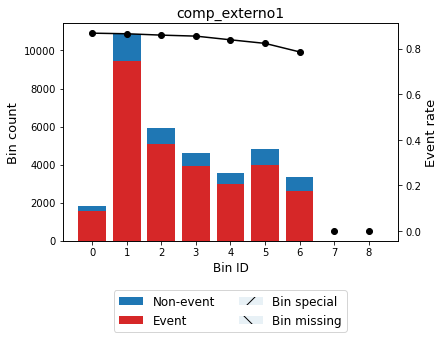

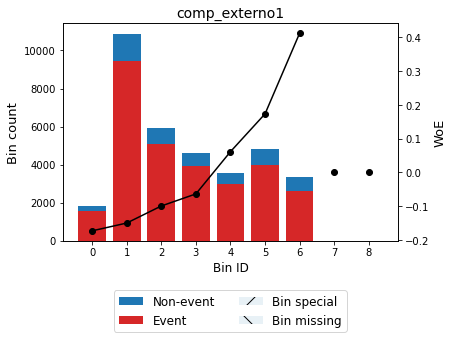

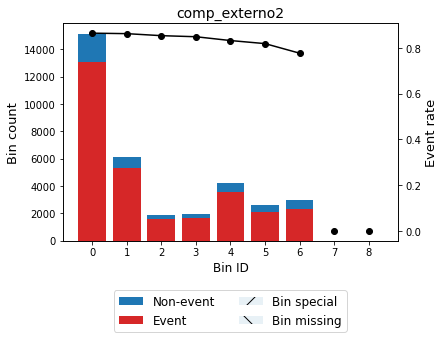

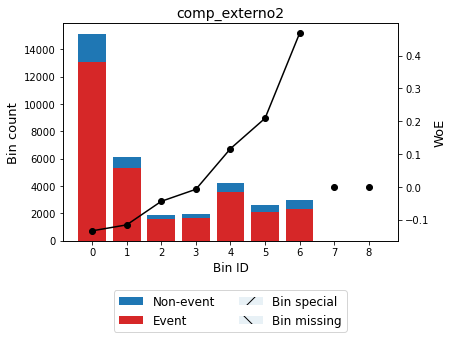

In [21]:
comp_externo1_table.plot(metric="event_rate")
comp_externo1_table.plot(metric="woe")




comp_externo2_table.plot(metric="event_rate")
comp_externo2_table.plot(metric="woe")


In [22]:
train["woe_comp_mixto1"]=optb_comp_mixto1.transform(train["comp_mixto1"],metric='woe')   
train["woe_comp_externo1"]=optb_comp_externo1.transform(train["comp_externo1"],metric='woe')   
train["woe_comp_externo2"]=optb_comp_externo2.transform(train["comp_externo2"],metric='woe')   
train["woe_comp_externo3"]=optb_comp_externo3.transform(train["comp_externo3"],metric='woe')   
train["woe_comp_externo4"]=optb_comp_externo4.transform(train["comp_externo4"],metric='woe')   
train["woe_comp_interno2"]=optb_comp_interno2.transform(train["comp_interno2"],metric='woe')   
train["woe_fecha_inicio"]=optb_fecha_inicio.transform(train["fecha_inicio"],metric='woe')   
train["woe_comp_interno1"]=optb_comp_interno1.transform(train["comp_interno1"],metric='woe')   
train["woe_categoria1"]=optb_categoria1.transform(train["categoria1"],metric='woe')   
train["woe_categoria2"]=optb_categoria2.transform(train["categoria2"],metric='woe')   
train["woe_categoria3"]=optb_categoria3.transform(train["categoria3"],metric='woe')   
train["woe_inversion"]=optb_inversion.transform(train["inversion"],metric='woe') 


<ipython-input-22-91348b85c697>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["woe_comp_mixto1"]=optb_comp_mixto1.transform(train["comp_mixto1"],metric='woe')
<ipython-input-22-91348b85c697>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["woe_comp_externo1"]=optb_comp_externo1.transform(train["comp_externo1"],metric='woe')
<ipython-input-22-91348b85c697>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

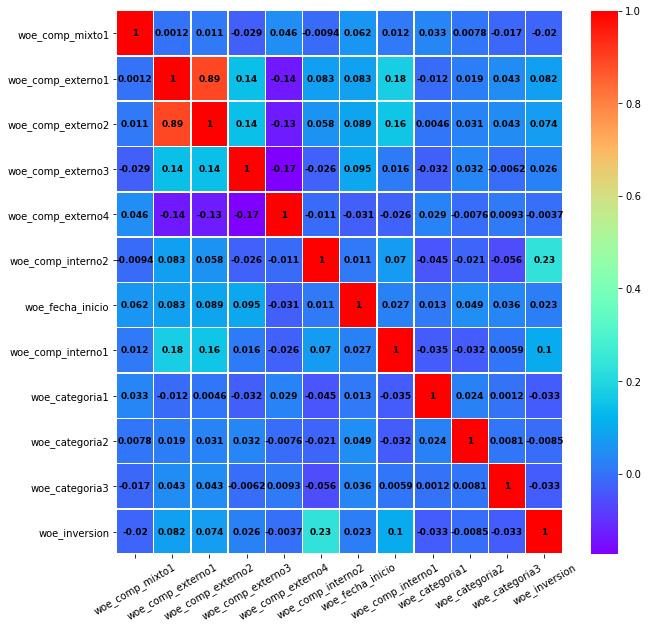

In [23]:
corr = train.iloc[:,17:].corr()

xticks = list(corr.index)  
yticks = list(corr.index)  
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1, 1, 1)

sns.heatmap(corr,annot=True,cmap="rainbow",ax=ax1,linewidths=.5,annot_kws={'size':9,'weight':'bold', 'color':'k'})
ax1.set_xticklabels(xticks, rotation=30, fontsize=10)
ax1.set_yticklabels(yticks, rotation=0, fontsize=10)
plt.show()

In [24]:
#['Y',"woe_comp_mixto1""woe_comp_externo2""woe_comp_externo3""woe_comp_externo4""woe_comp_interno1""woe_categoria3"]

In [25]:
X_woe_train=train.iloc[:,17:29]
y_train=train.iloc[:,16]
#X_woe_train.head()
x_train=train.copy()


In [26]:
#train=train[['Y',"woe_comp_externo1","woe_comp_externo2","woe_comp_externo3","woe_fecha_inicio","woe_categoria2","woe_categoria3"]]
train=train[['Y',"woe_comp_mixto1","woe_comp_externo2","woe_comp_externo3","woe_comp_externo4","woe_comp_interno1","woe_categoria3"]]

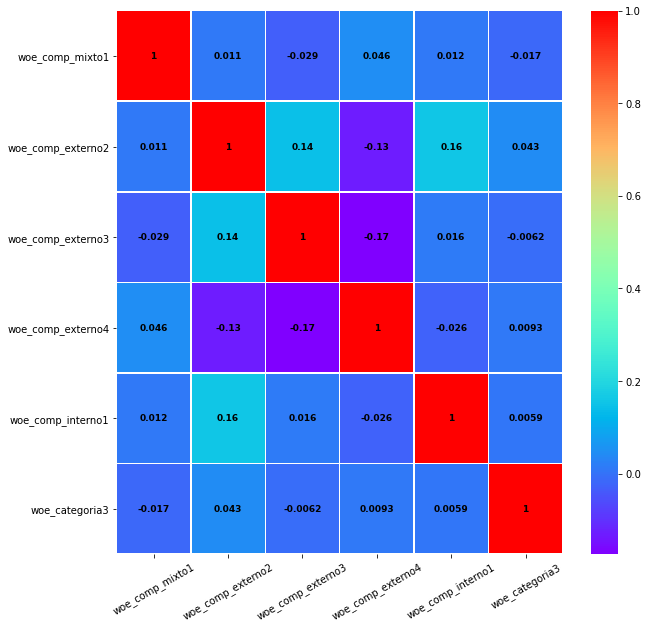

In [27]:
corr = train.iloc[:,1:].corr()
corr
xticks = list(corr.index)  
yticks = list(corr.index)  
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1, 1, 1)

sns.heatmap(corr,annot=True,cmap="rainbow",ax=ax1,linewidths=.5,annot_kws={'size':9,'weight':'bold', 'color':'k'})
ax1.set_xticklabels(xticks, rotation=30, fontsize=10)
ax1.set_yticklabels(yticks, rotation=0, fontsize=10)
plt.show()

In [28]:
model=LogisticRegression()
clf=model.fit(X_woe_train,y_train)

y_pred
 [1 1 1 ... 1 1 1]
y_pred1
 [3.12206428 4.73663636 4.84990646 ... 2.37510966 5.24251562 3.13650028]


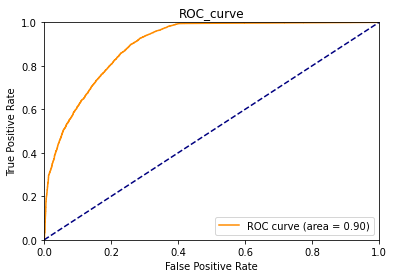

In [29]:
y_pred=clf.predict(X_woe_train)
y_pred1=clf.decision_function(X_woe_train)
print('y_pred\n',y_pred)
print('y_pred1\n',y_pred1)

fpr,tpr,threshold = roc_curve(y_train, y_pred1)
roc_auc = auc(fpr,tpr)
plot(fpr,tpr,color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_curve')
plt.legend(loc="lower right")
plt.show()


In [30]:
coe=model.coef_
coe

array([[-1.65122067e-01,  9.75515954e-03,  2.32391271e-01,
         6.66471821e-01, -4.14525199e+00, -1.13822546e-03,
        -1.01444654e+00, -6.72052465e-01, -1.22080236e+00,
        -3.04847072e-01, -1.11311782e+00, -2.03691940e-01]])

In [31]:
coe=model.coef_
coe

array([[-1.65122067e-01,  9.75515954e-03,  2.32391271e-01,
         6.66471821e-01, -4.14525199e+00, -1.13822546e-03,
        -1.01444654e+00, -6.72052465e-01, -1.22080236e+00,
        -3.04847072e-01, -1.11311782e+00, -2.03691940e-01]])

In [32]:
model.intercept_


array([1.72738055])

In [33]:
#optenemos el predict

y_pre_fit=clf.predict_proba(X_woe_train)
len(y_pre_fit[:,0])


35000

In [34]:
y_pre_fit

array([[0.04220624, 0.95779376],
       [0.00869188, 0.99130812],
       [0.00776829, 0.99223171],
       ...,
       [0.08509051, 0.91490949],
       [0.00525914, 0.99474086],
       [0.04162651, 0.95837349]])

In [35]:
type(y_train)

pandas.core.series.Series

In [36]:
data=y_train.to_frame()

In [37]:
data['estimado']=y_pre_fit[:,1]
data

,Y,estimado
48824,1,0.957794
2704,1,0.991308
25631,1,0.992232
7285,1,0.994006
27346,1,0.864508
...,...,...
16304,0,0.039743
79,1,0.889809
12119,1,0.914909
14147,1,0.994741


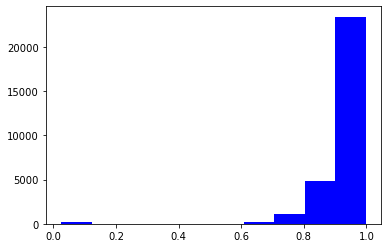

In [38]:
hist(data[data['Y']==1]['estimado'],color="blue")
show()

In [39]:
#KS
ecdf_buenos=ECDF(data.loc[data.Y==1,"estimado"])
ecdf_malos=ECDF(data.loc[data.Y==0,"estimado"])
grid_score=np.sort(data.estimado.unique())
prob_acu_buenos=ecdf_buenos(grid_score)
prob_acu_malos=ecdf_malos(grid_score)


In [40]:
abs_dif=np.abs(prob_acu_buenos-prob_acu_malos)
ks=np.max(abs_dif)
ks

0.6405650917955532

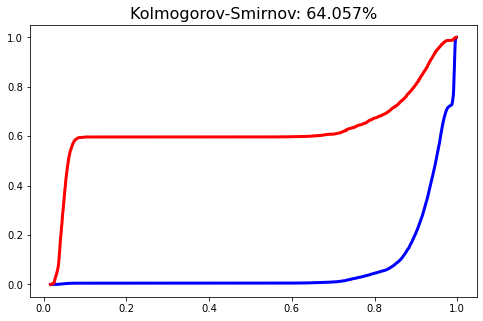

In [41]:
fig,ax=plt.subplots(figsize=(8,5))
ax.set_title(f"Kolmogorov-Smirnov: {ks:.3%}",fontsize=16)
plot(grid_score,prob_acu_buenos,color='blue',linewidth=3)
plot(grid_score,prob_acu_malos,color='red',linewidth=3)

In [44]:
X_train, X_test, y_train, y_test=train_test_split(train, data,test_size=0.2,stratify=y)


,Y,woe_comp_mixto1,woe_comp_externo2,woe_comp_externo3,woe_comp_externo4,woe_comp_interno1,woe_categoria3
48937,0,-0.381814,0.116268,-0.111215,-0.006943,-0.040942,-0.022965
19539,1,0.025525,0.468846,0.280531,-0.006943,0.199113,0.032574
25292,1,0.025525,-0.134565,0.344659,-0.006943,-0.040942,-0.342650
7889,0,0.055513,-0.134565,-0.111215,-0.006943,-0.040942,0.202341
5130,1,-0.381814,-0.044444,-0.111215,-0.006943,0.121005,-0.342650
...,...,...,...,...,...,...,...
13898,1,-0.381814,0.468846,-0.005403,-0.006943,-0.040942,0.059673
938,1,0.055513,-0.044444,-0.111215,-0.006943,-0.040942,-0.111678
29567,1,-0.381814,0.468846,0.208867,-0.006943,-0.040942,0.017161
18647,1,0.025525,-0.134565,-0.111215,0.076789,0.121005,-0.111678


train_test_split(X_woe_train, data,test_size=0.2,stratify=y)


TypeError: estimator should be an estimator implementing 'fit' method, array([1, 1, 1, ..., 1, 1, 1], dtype=int64) was passed